In [1]:
from CNN import *
from sklearn.preprocessing import StandardScaler

all_labels = ['height', 'phi', 'theta', 
        'impact site x', 'impact site y', 'impact site z', 
        'impact site r', 'impact site phi', 'impact site theta']

'''the dataset we are useing's path'''
full_dataset_pathname = "/Volumes/Jake_ssd/Paper_1_results_no_feature_engineering/dataset/New_Crack_Len_FULL_OG_dataframe_2023_11_16.csv"
full_df = pd.read_csv(full_dataset_pathname, index_col=0)
# full_dataset_pathname = "/Volumes/Jake_ssd/Paper_1_results_WITH_feature_engineering/dataset/feature_transformations_2023-11-16/height/HEIGHTALL_TRANSFORMED_FEATURES.csv"
# full_df = pd.read_csv(full_dataset_pathname)
'''where the results are stored'''
# results_folder = '/Volumes/Jake_ssd/Paper_1_results_no_feature_engineering/results'
results_folder = '/Volumes/Jake_ssd/Paper_1_results_WITH_feature_engineering/results'




In [2]:
label_df = full_df[all_labels]
feature_df = full_df.drop(all_labels, axis=1)

'''removing all ofthe columns that contain 'timestep_init' in their name'''
feature_df = feature_df[feature_df.columns[~feature_df.columns.str.contains('timestep_init')]]

'''normalizing all of the features'''
# Initializing the StandardScaler
scaler = StandardScaler()
# Normalizing and zero-centering the dataframe
feature_df = pd.DataFrame(scaler.fit_transform(feature_df), columns=feature_df.columns)
print(feature_df.head)


<bound method NDFrame.head of        init z    init y    init x  max_prop_speed  avg_prop_speed  \
0    0.619491  0.175101  0.402692       -0.737205       -0.045075   
1    0.515350 -1.111787 -0.215114       -0.757941       -0.084572   
2   -4.670302 -3.096005  1.451425       -0.939100       -0.429644   
3    0.619491  0.175101  0.402692       -0.836577       -0.234358   
4   -1.305640  0.520393 -2.108091       -0.843549       -0.415103   
..        ...       ...       ...             ...             ...   
296  0.692959 -0.171864  0.016645       -0.742823       -0.055775   
297 -0.992889  0.014289 -2.045863       -0.853230       -0.266078   
298 -1.683001  0.945936  1.926601        0.187816       -0.354742   
299 -1.305640  0.520393 -2.108091       -0.454911       -0.371802   
300  0.619491  0.175101  0.402692        0.385332       -0.086512   

     dist btw frts  crack len  linearity  max thickness  mean thickness  ...  \
0        -0.836302  -0.805450   0.014716       0.417260      

In [3]:
# label_predicted = 'impact site x'
label_predicted = 'impact site y'
# label_predicted = 'height'

kf = KFold(n_splits=5, shuffle=True)

kfold_models = []
kfold_histories = []
fold_no = 0

all_train_feats = []
all_train_labels = []
all_val_feats = []
all_val_labels = []
# Splitting the data into folds
for train_index, val_index in kf.split(feature_df):
    fold_no +=1
    print(f'TRAINING FOLD {fold_no}')
    
    train_df = feature_df.iloc[train_index]
    val_df = feature_df.iloc[val_index]
    train_labels = label_df.iloc[train_index]
    val_labels = label_df.iloc[val_index]
    
    model, history = make_1D_CNN_for_ensemble(train_df, 
                                     val_df, 
                                     train_labels[label_predicted], 
                                     val_labels[label_predicted], 
                                     patience=200, 
                                     max_epochs=2000, 
                                     num_outputs=1, 
                                     lossfunc='mean_squared_error',#mean_absolute_error for height
                                     verbose=True,
                                     L1=0.1, #0.01 for height
                                     L2=0.01, #0.01 for height
                                     dropout=0.2) #0.2 for height
    kfold_models.append(model)
    kfold_histories.append(history)
    all_train_feats.append(train_df)
    all_train_labels.append(train_labels)
    all_val_feats.append(val_df)
    all_val_labels.append(val_labels)

TRAINING FOLD 1
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-11-17 19:11:43.038622: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-17 19:11:43.038813: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-11-17 19:11:43.079691: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-11-17 19:11:43.153648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-11-17 19:11:43.174709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/2000


2023-11-17 19:11:43.981600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 2s 69ms/step - loss: 443.8255 - val_loss: 441.0078
Epoch 2/2000
1/8 [==>...........................] - ETA: 0s - loss: 483.1571

2023-11-17 19:11:44.850211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 19ms/step - loss: 425.9418 - val_loss: 433.1716
Epoch 3/2000
8/8 [==============================] - 0s 17ms/step - loss: 399.0148 - val_loss: 425.5698
Epoch 4/2000
8/8 [==============================] - 0s 16ms/step - loss: 381.3248 - val_loss: 417.4688
Epoch 5/2000
8/8 [==============================] - 0s 18ms/step - loss: 363.3251 - val_loss: 408.2519
Epoch 6/2000
8/8 [==============================] - 0s 18ms/step - loss: 344.8350 - val_loss: 397.0403
Epoch 7/2000
8/8 [==============================] - 0s 19ms/step - loss: 342.4219 - val_loss: 384.8192
Epoch 8/2000
8/8 [==============================] - 0s 22ms/step - loss: 325.8055 - val_loss: 373.4040
Epoch 9/2000
8/8 [==============================] - 0s 23ms/step - loss: 313.0735 - val_loss: 364.4911
Epoch 10/2000
8/8 [==============================] - 0s 21ms/step - loss: 302.0878 - val_loss: 355.1691
Epoch 11/2000
8/8 [==============================] - 0s 17ms/step - loss: 298.9655 - 

2023-11-17 19:14:18.099576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-11-17 19:14:18.121300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/2000


2023-11-17 19:14:18.746048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 1s 70ms/step - loss: 446.9665 - val_loss: 441.5759
Epoch 2/2000
1/8 [==>...........................] - ETA: 0s - loss: 476.2449

2023-11-17 19:14:19.530071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 19ms/step - loss: 413.8504 - val_loss: 435.4199
Epoch 3/2000
8/8 [==============================] - 0s 21ms/step - loss: 398.2352 - val_loss: 429.7174
Epoch 4/2000
8/8 [==============================] - 0s 17ms/step - loss: 385.1246 - val_loss: 423.8230
Epoch 5/2000
8/8 [==============================] - 0s 17ms/step - loss: 366.7654 - val_loss: 417.2866
Epoch 6/2000
8/8 [==============================] - 0s 16ms/step - loss: 355.3561 - val_loss: 410.4464
Epoch 7/2000
8/8 [==============================] - 0s 17ms/step - loss: 336.5816 - val_loss: 402.5421
Epoch 8/2000
8/8 [==============================] - 0s 16ms/step - loss: 325.3459 - val_loss: 394.6336
Epoch 9/2000
8/8 [==============================] - 0s 16ms/step - loss: 303.5884 - val_loss: 386.3861
Epoch 10/2000
8/8 [==============================] - 0s 16ms/step - loss: 300.1421 - val_loss: 379.5528
Epoch 11/2000
8/8 [==============================] - 0s 16ms/step - loss: 286.8260 - 

2023-11-17 19:15:14.772128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-11-17 19:15:14.794605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-11-17 19:15:15.802527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 2s 84ms/step - loss: 458.7257 - val_loss: 387.3444
Epoch 2/2000
1/8 [==>...........................] - ETA: 0s - loss: 523.2156

2023-11-17 19:15:16.743987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 24ms/step - loss: 430.4389 - val_loss: 382.3793
Epoch 3/2000
8/8 [==============================] - 0s 18ms/step - loss: 418.3260 - val_loss: 377.5744
Epoch 4/2000
8/8 [==============================] - 0s 16ms/step - loss: 396.1856 - val_loss: 372.9157
Epoch 5/2000
8/8 [==============================] - 0s 17ms/step - loss: 382.9419 - val_loss: 368.1711
Epoch 6/2000
8/8 [==============================] - 0s 17ms/step - loss: 352.6046 - val_loss: 363.0127
Epoch 7/2000
8/8 [==============================] - 0s 18ms/step - loss: 350.8470 - val_loss: 356.8920
Epoch 8/2000
8/8 [==============================] - 0s 20ms/step - loss: 333.0573 - val_loss: 350.1678
Epoch 9/2000
8/8 [==============================] - 0s 16ms/step - loss: 329.8024 - val_loss: 343.4985
Epoch 10/2000
8/8 [==============================] - 0s 16ms/step - loss: 304.9053 - val_loss: 335.5211
Epoch 11/2000
8/8 [==============================] - 0s 18ms/step - loss: 295.6201 - 

2023-11-17 19:16:16.184899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-11-17 19:16:16.205267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/2000


2023-11-17 19:16:16.819161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 2s 89ms/step - loss: 430.9539 - val_loss: 489.1043
Epoch 2/2000
1/8 [==>...........................] - ETA: 0s - loss: 334.4753

2023-11-17 19:16:17.738707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 22ms/step - loss: 408.2538 - val_loss: 481.3162
Epoch 3/2000
8/8 [==============================] - 0s 20ms/step - loss: 389.4925 - val_loss: 473.5169
Epoch 4/2000
8/8 [==============================] - 0s 16ms/step - loss: 369.7623 - val_loss: 465.6709
Epoch 5/2000
8/8 [==============================] - 0s 18ms/step - loss: 350.4342 - val_loss: 456.8467
Epoch 6/2000
8/8 [==============================] - 0s 17ms/step - loss: 330.1316 - val_loss: 446.8113
Epoch 7/2000
8/8 [==============================] - 0s 16ms/step - loss: 321.5996 - val_loss: 435.6369
Epoch 8/2000
8/8 [==============================] - 0s 16ms/step - loss: 318.7215 - val_loss: 423.9177
Epoch 9/2000
8/8 [==============================] - 0s 17ms/step - loss: 301.7979 - val_loss: 412.1747
Epoch 10/2000
8/8 [==============================] - 0s 17ms/step - loss: 287.4928 - val_loss: 399.0876
Epoch 11/2000
8/8 [==============================] - 0s 16ms/step - loss: 279.2494 - 

2/2 [==============================] - 0s 33ms/step


2023-11-17 19:05:27.021291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 8ms/step


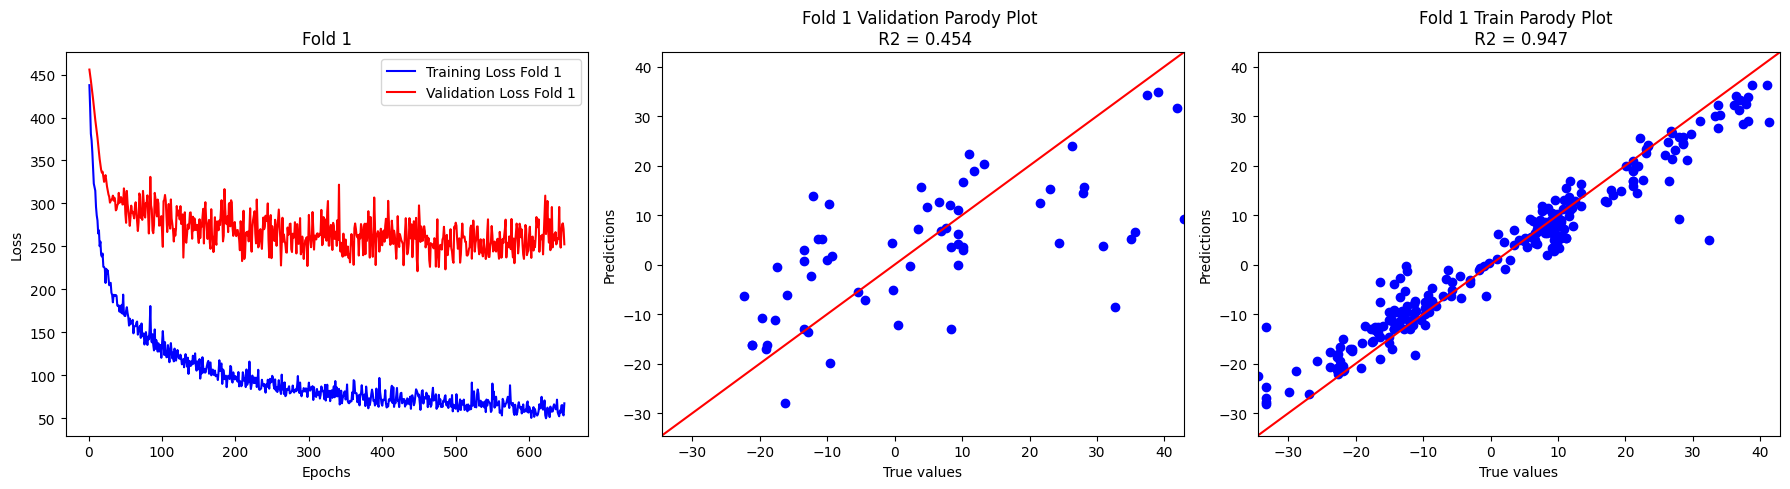

1/8 [==>...........................] - ETA: 0s

2023-11-17 19:05:27.672128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 12ms/step


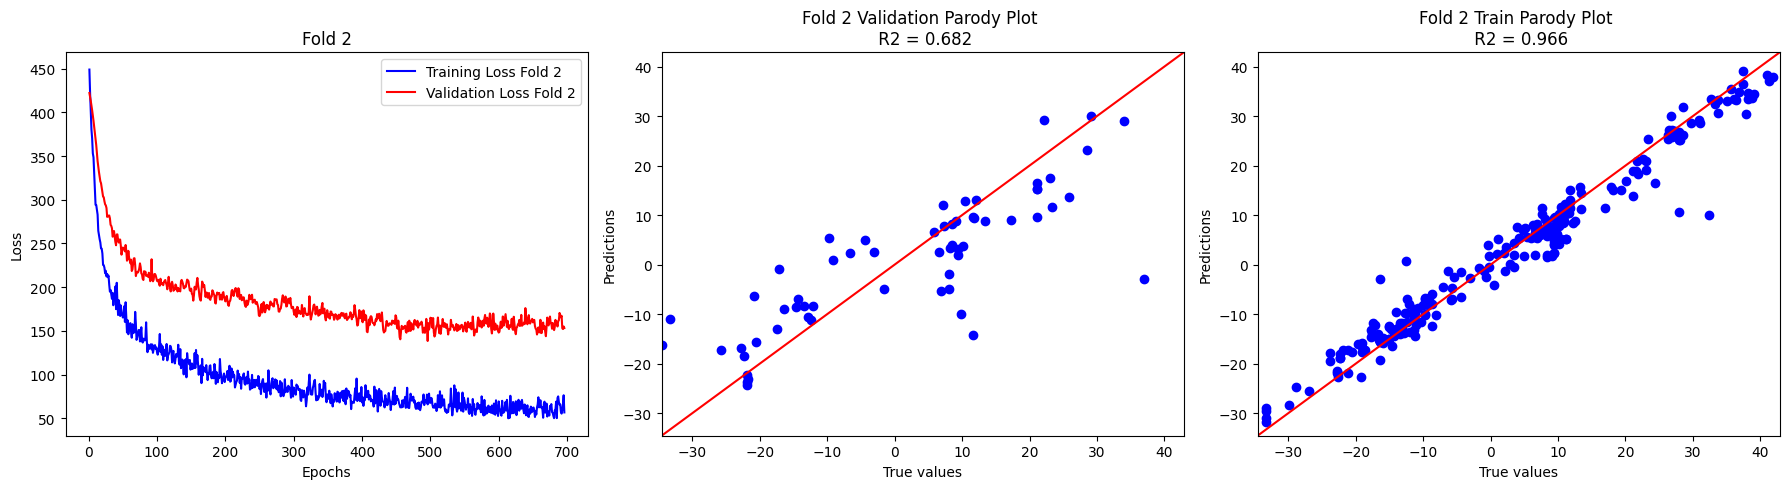

1/8 [==>...........................] - ETA: 0s

2023-11-17 19:05:28.299614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 10ms/step


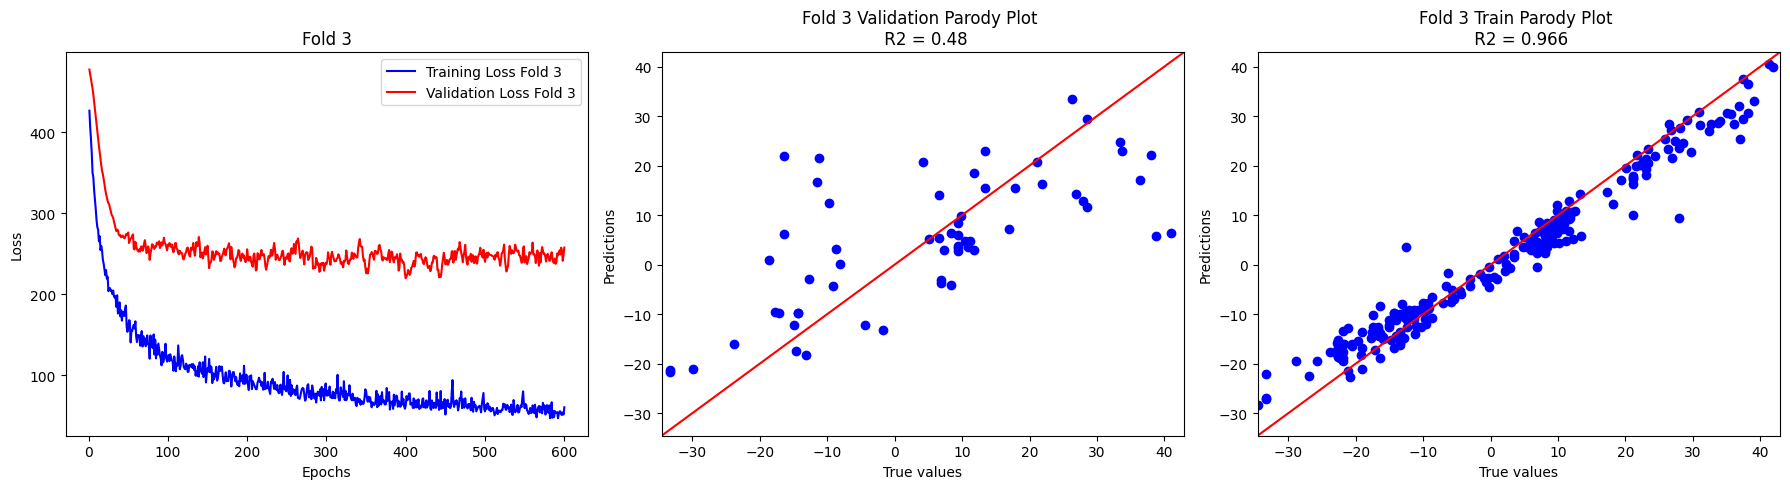

2/2 [==============================] - 0s 51ms/step


2023-11-17 19:05:28.877085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 7ms/step


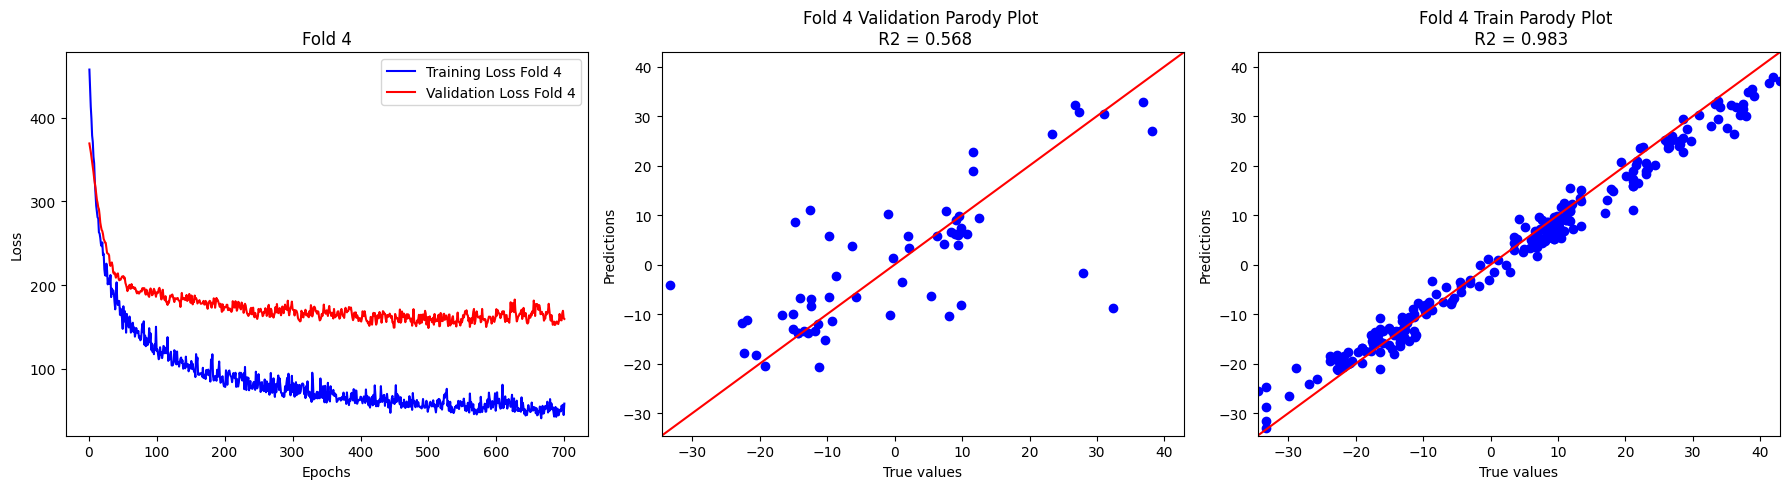

8/8 [==============================] - 0s 7ms/step


2023-11-17 19:05:29.493685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


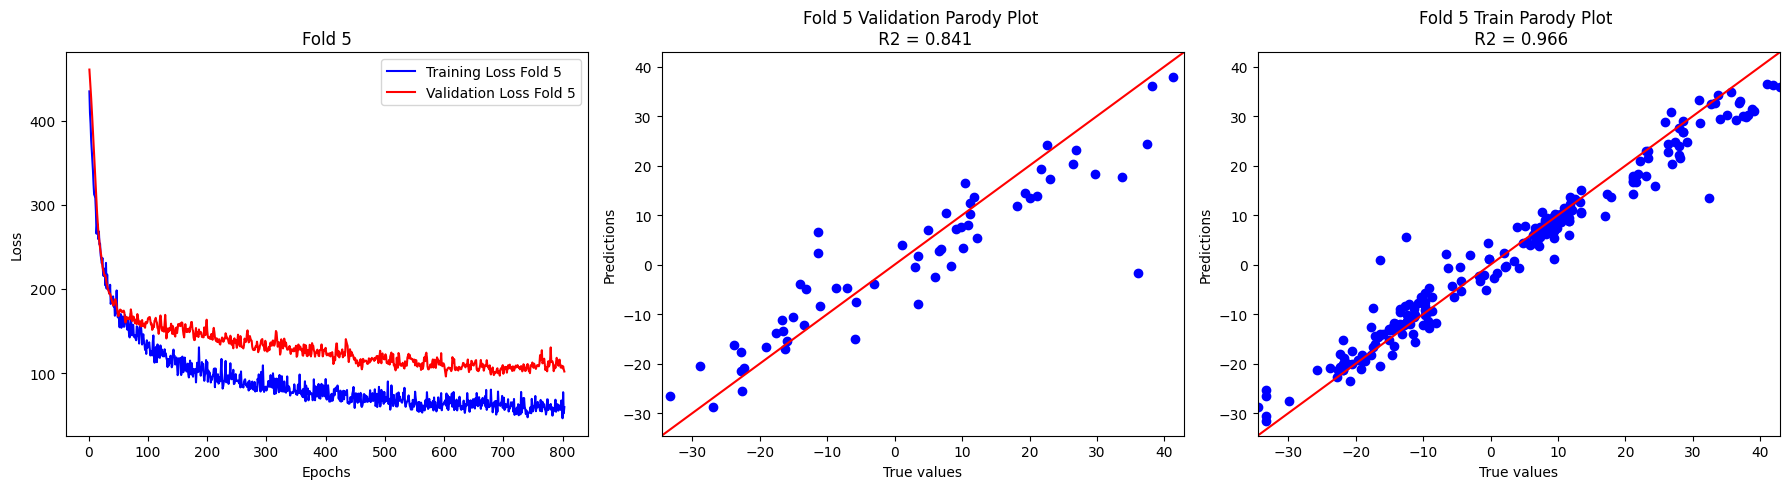

In [ ]:
# Assuming kfold_histories is available and contains history objects

for i, history in enumerate(kfold_histories):
    plt.figure(figsize=(18, 5))

    # Training Loss Plot
    plt.subplot(1, 3, 1)
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']
    epochs = range(1, len(training_loss) + 1)
    plt.plot(epochs, training_loss, 'b', label=f'Training Loss Fold {i+1}')
    plt.plot(epochs, validation_loss, 'r', label=f'Validation Loss Fold {i+1}')
    plt.title(f'Fold {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()


    # Parody Plot (Validation Examples)
    plt.subplot(1, 3, 2)
    model = kfold_models[i]
    val_feats = all_val_feats[i]
    val_labels = all_val_labels[i]

    val_preds = model.predict(val_feats)
    plt.scatter(val_labels[label_predicted], val_preds, c='b')
    # Define the range for the line based on the min and max of the selected column
    x_min = label_df[label_predicted].min()
    x_max = label_df[label_predicted].max()
    # Create a range of values for x and y since the slope is 1
    x = np.linspace(x_min, x_max, 100)
    y = x  # y = x because the slope is 1
    plt.plot(x, y, 3, c='r')
    # For example, a scatter plot or any other relevant visualization
    # Example: plt.scatter(validation_features, validation_labels)
    r_squared = r2_score(val_preds[:,0], val_labels[label_predicted])
    corr_coefficient, p_value = pearsonr(val_preds[:,0], val_labels[label_predicted])

    # Calculate R^2 value
    r_squared = corr_coefficient ** 2
    plt.title(f'Fold {i+1} Validation Parody Plot \n R2 = {np.round(r_squared, 3)}')
    plt.xlabel('True values')
    plt.ylabel('Predictions')
    plt.xlim((x_min,x_max))
    plt.ylim((x_min,x_max))
    
    
    # Parody Plot (Train Examples)
    plt.subplot(1, 3, 3)
    model = kfold_models[i]
    train_feats = all_train_feats[i]
    train_labels = all_train_labels[i]

    train_preds = model.predict(train_feats)
    plt.scatter(train_labels[label_predicted], train_preds, c='b')
    # Define the range for the line based on the min and max of the selected column
    x_min = label_df[label_predicted].min()
    x_max = label_df[label_predicted].max()
    # Create a range of values for x and y since the slope is 1
    x = np.linspace(x_min, x_max, 100)
    y = x  # y = x because the slope is 1
    plt.plot(x, y, 3, c='r')
    # For example, a scatter plot or any other relevant visualization
    # Example: plt.scatter(validation_features, validation_labels)
    r_squared = r2_score(train_preds[:,0], train_labels[label_predicted])
    corr_coefficient, p_value = pearsonr(train_preds[:,0], train_labels[label_predicted])

    # Calculate R^2 value
    r_squared = corr_coefficient ** 2
    plt.title(f'Fold {i+1} Train Parody Plot \n R2 = {np.round(r_squared, 3)}')
    plt.xlabel('True values')
    plt.ylabel('Predictions')
    plt.xlim((x_min,x_max))
    plt.ylim((x_min,x_max))

    plt.tight_layout()
    plt.show()
